# 1. Regresión Lineal Simple


*   La regresión lineal es un modelo que predice el valor de datos desconocidos mediante el uso de otro valor de datos relacionado y conocido.


## Importar librerias

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importar dataset

In [ ]:
dataset = pd.read_csv('Salary_Data.csv')
X = dataset.iloc[:, :-1].values #guardamos datos de la primera columna
y = dataset.iloc[:, -1].values #guardamos datos de la segunda columna

y


array([ 39343.,  46205.,  37731.,  43525.,  39891.,  56642.,  60150.,
        54445.,  64445.,  57189.,  63218.,  55794.,  56957.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  93940.,  91738.,
        98273., 101302., 113812., 109431., 105582., 116969., 112635.,
       122391., 121872.])

## Dividir un conjunto de datos en un conjunto de entrenamiento y un conjunto de pruebas

In [ ]:
from sklearn.model_selection import train_test_split
#X e y son tus características y etiquetas, respectivamente, La proporción de división es 1/3 para el conjunto de prueba y 2/3 para el conjunto de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

## Entrenamiento del modelo de regresión lineal simple en el conjunto de entrenamiento

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() # Crea una instancia del modelo de Regresión Lineal
regressor.fit(X_train, y_train) # Ajusta el modelo a los datos de entrenamiento

LinearRegression()

## Predicción de los resultados del conjunto de pruebas

In [ ]:
y_pred = regressor.predict(X_test) #predicciones basadas en un conjunto de características dado (X_test)

## Visualizando los resultados del conjunto de entrenamiento

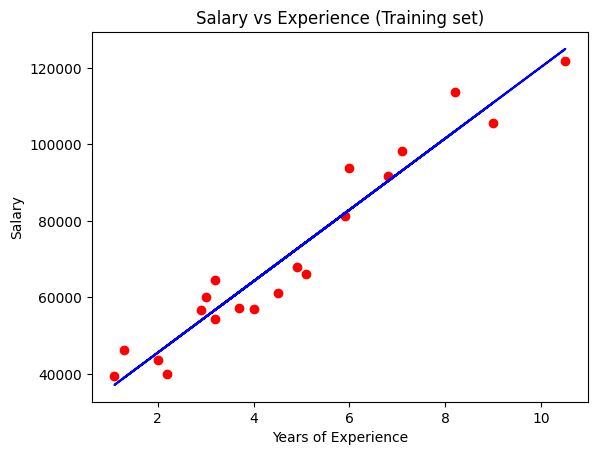

In [ ]:
plt.scatter(X_train, y_train, color = 'red') #puntos
plt.plot(X_train, regressor.predict(X_train), color = 'blue') #linea
plt.title('Salary vs Experience (Training set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

## Visualising the Test set results

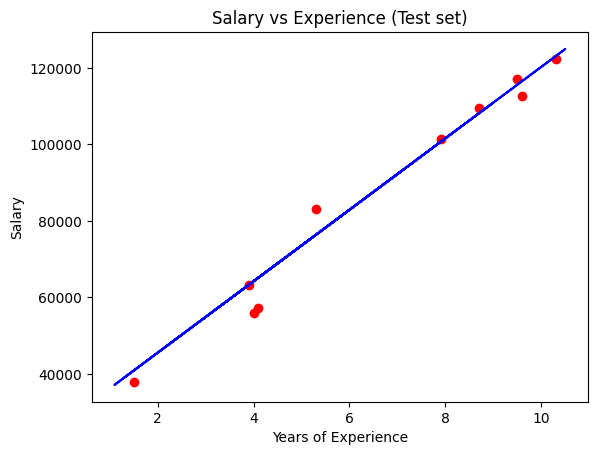

In [ ]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

# 2. Regresión lineal Multiple


## Importación de librerias

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importar el dataset

In [ ]:
dataset = pd.read_csv('50_Startups.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
print(X)

[[165349.2 136897.8 471784.1 'New York']
 [162597.7 151377.59 443898.53 'California']
 [153441.51 101145.55 407934.54 'Florida']
 [144372.41 118671.85 383199.62 'New York']
 [142107.34 91391.77 366168.42 'Florida']
 [131876.9 99814.71 362861.36 'New York']
 [134615.46 147198.87 127716.82 'California']
 [130298.13 145530.06 323876.68 'Florida']
 [120542.52 148718.95 311613.29 'New York']
 [123334.88 108679.17 304981.62 'California']
 [101913.08 110594.11 229160.95 'Florida']
 [100671.96 91790.61 249744.55 'California']
 [93863.75 127320.38 249839.44 'Florida']
 [91992.39 135495.07 252664.93 'California']
 [119943.24 156547.42 256512.92 'Florida']
 [114523.61 122616.84 261776.23 'New York']
 [78013.11 121597.55 264346.06 'California']
 [94657.16 145077.58 282574.31 'New York']
 [91749.16 114175.79 294919.57 'Florida']
 [86419.7 153514.11 0.0 'New York']
 [76253.86 113867.3 298664.47 'California']
 [78389.47 153773.43 299737.29 'New York']
 [73994.56 122782.75 303319.26 'Florida']
 [67532


## Codificación de datos categóricos

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# ColumnTransformer para aplicar transformaciones a columnas específicas
# 'encoder' aplica OneHotEncoder a la columna 3, 'remainder='passthrough'' mantiene las demás columnas sin cambios
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')

# Aplicar la transformación definida por ColumnTransformer al conjunto de características X
# Esto convierte la columna 3 en variables dummy y mantiene las otras columnas intactas
X = np.array(ct.fit_transform(X))

In [ ]:
print(X)

[[0.0 0.0 1.0 165349.2 136897.8 471784.1]
 [1.0 0.0 0.0 162597.7 151377.59 443898.53]
 [0.0 1.0 0.0 153441.51 101145.55 407934.54]
 [0.0 0.0 1.0 144372.41 118671.85 383199.62]
 [0.0 1.0 0.0 142107.34 91391.77 366168.42]
 [0.0 0.0 1.0 131876.9 99814.71 362861.36]
 [1.0 0.0 0.0 134615.46 147198.87 127716.82]
 [0.0 1.0 0.0 130298.13 145530.06 323876.68]
 [0.0 0.0 1.0 120542.52 148718.95 311613.29]
 [1.0 0.0 0.0 123334.88 108679.17 304981.62]
 [0.0 1.0 0.0 101913.08 110594.11 229160.95]
 [1.0 0.0 0.0 100671.96 91790.61 249744.55]
 [0.0 1.0 0.0 93863.75 127320.38 249839.44]
 [1.0 0.0 0.0 91992.39 135495.07 252664.93]
 [0.0 1.0 0.0 119943.24 156547.42 256512.92]
 [0.0 0.0 1.0 114523.61 122616.84 261776.23]
 [1.0 0.0 0.0 78013.11 121597.55 264346.06]
 [0.0 0.0 1.0 94657.16 145077.58 282574.31]
 [0.0 1.0 0.0 91749.16 114175.79 294919.57]
 [0.0 0.0 1.0 86419.7 153514.11 0.0]
 [1.0 0.0 0.0 76253.86 113867.3 298664.47]
 [0.0 0.0 1.0 78389.47 153773.43 299737.29]
 [0.0 1.0 0.0 73994.56 122782.75 3

## Dividir el conjunto de datos en conjunto de entrenamiento y conjunto de prueba

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Entrenamiento del modelo de regresión lineal múltiple

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() # Crea una instancia del modelo de regresión lineal.
regressor.fit(X_train, y_train) #Utiliza el método fit() del modelo de regresión lineal para ajustar el modelo a los datos de entrenamiento X_train (características de entrenamiento) y y_train (etiquetas de entrenamiento). En este paso, el modelo aprende los patrones y relaciones entre las características y las etiquetas.

LinearRegression()

## Predicción de los resultados del conjunto de pruebas

In [ ]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2) #Configura la precisión de impresión de numpy para que las matrices impriman solo dos decimales después del punto decimal.
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[103015.2  103282.38]
 [132582.28 144259.4 ]
 [132447.74 146121.95]
 [ 71976.1   77798.83]
 [178537.48 191050.39]
 [116161.24 105008.31]
 [ 67851.69  81229.06]
 [ 98791.73  97483.56]
 [113969.44 110352.25]
 [167921.07 166187.94]]


# 3. Regresión Polinomial



## Importar librerias

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importar dataset

In [ ]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

dataset.head()



,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


## Entrenamiento del modelo de regresión lineal en todo el conjunto de datos

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

#Utiliza el método fit() del modelo de regresión lineal para ajustar el modelo
#a tus datos X (características) e y (etiquetas). En este paso,
#el modelo aprende los patrones y relaciones entre las características y las etiquetas para realizar predicciones.

LinearRegression()

## Entrenamiento del modelo de regresión polinómica en todo el conjunto de datos

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# PolynomialFeatures se utiliza para generar características polinomiales
poly_reg = PolynomialFeatures(degree=4)  # Creamos una instancia para generar polinomios hasta grado 5

# Aplicamos la transformación polinomial a las características originales
X_poly = poly_reg.fit_transform(X)  # Se generan características polinomiales a partir de X

# Creamos un nuevo modelo de regresión lineal
lin_reg_2 = LinearRegression()

# Entrenamos el modelo de regresión lineal con las nuevas características polinomiales y las etiquetas
lin_reg_2.fit(X_poly, y)

LinearRegression()


## Visualizando los resultados de la regresión lineal

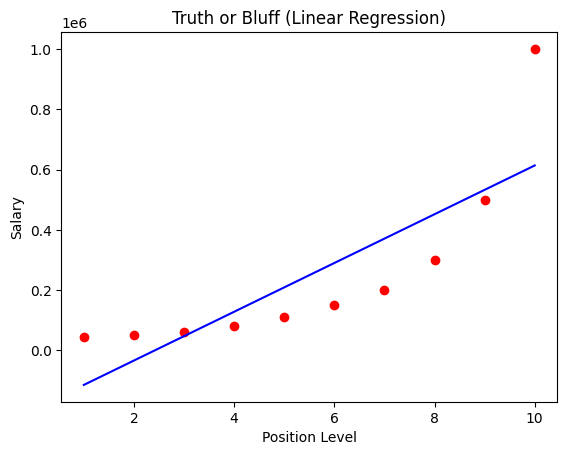

In [ ]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg.predict(X), color = 'blue')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Visualizando los resultados de la regresión polinómica

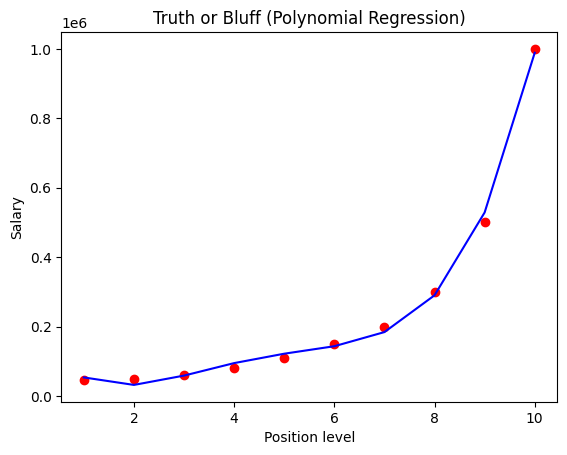

In [ ]:
plt.scatter(X, y, color = 'red')
plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


## Visualización de los resultados de la regresión polinómica (para una resolución más alta y una curva más suave)

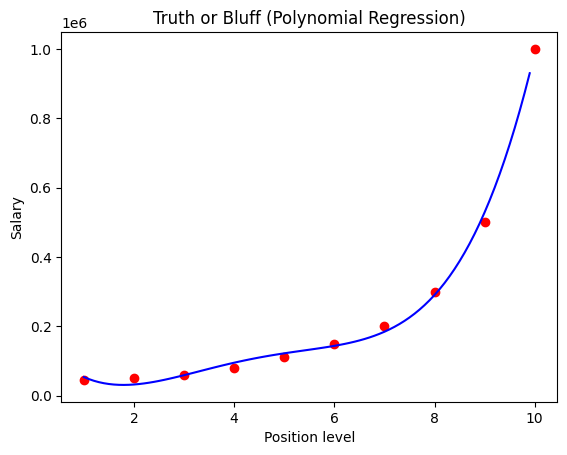

In [ ]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, lin_reg_2.predict(poly_reg.fit_transform(X_grid)), color = 'blue')
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Predecir un nuevo resultado con regresión lineal

In [ ]:
lin_reg.predict([[6.5]])

array([330378.79])

## Predecir un nuevo resultado con regresión polinómica

In [ ]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]]))

array([158862.45])

# 4. Support Vector Regression (SVR)

## Explicación

### Conjunto de datos

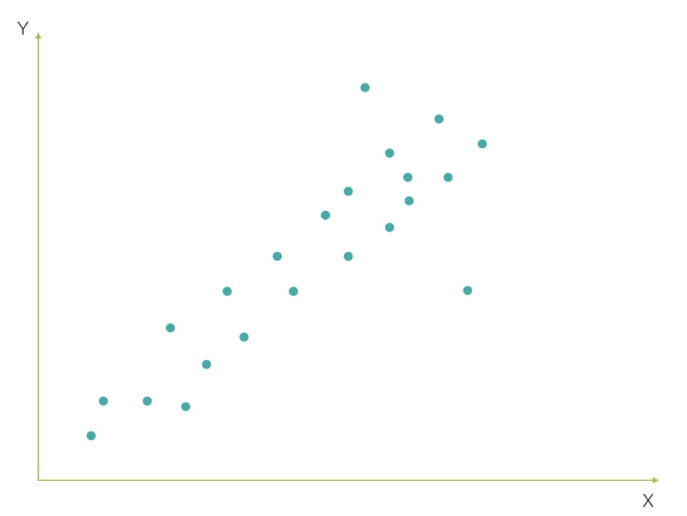

### Funcion de datos y de badas paralelas

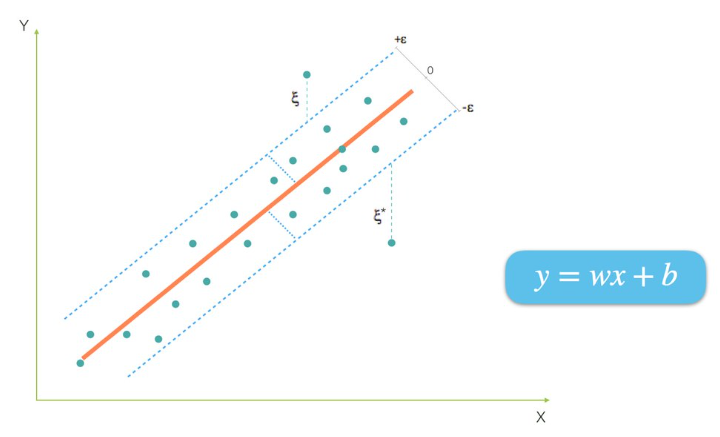

### En caso de que no sea lineal

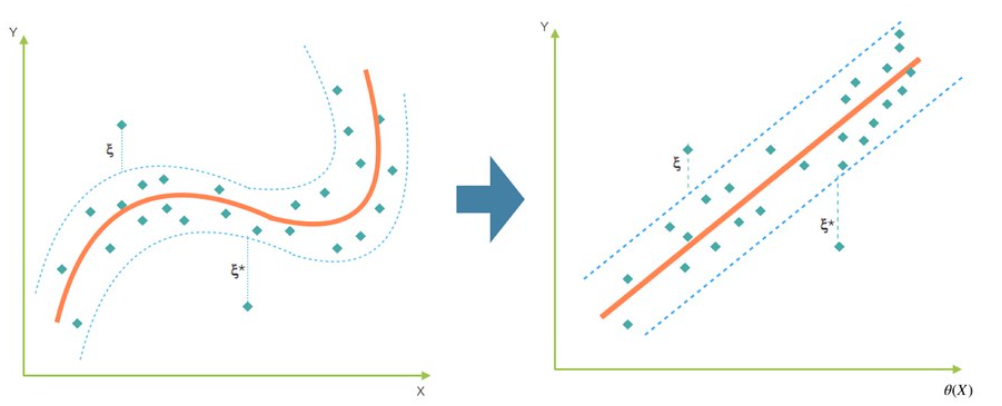

## Importar librerias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importar dataset

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [3]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [4]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [5]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [6]:
y = y.reshape(len(y),1)

In [7]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Escalado de características

In [8]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [9]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [10]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Entrenando el modelo SVR en todo el dataset

In [11]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## Predicción de un nuevo resultado

In [12]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

## Visualizando los resultados de SVR

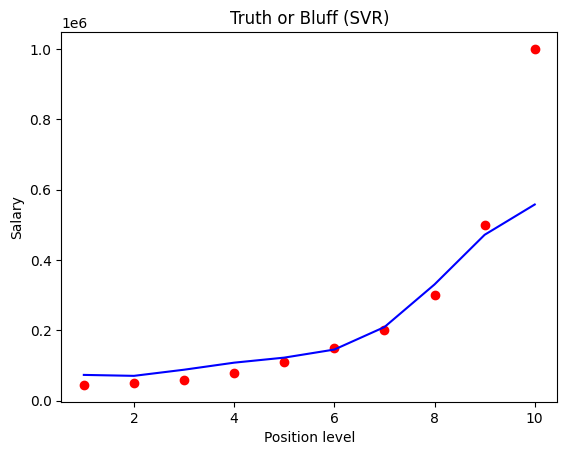

In [13]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X).reshape(-1,1)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# 5. Decision Tree Regression

## Explicación

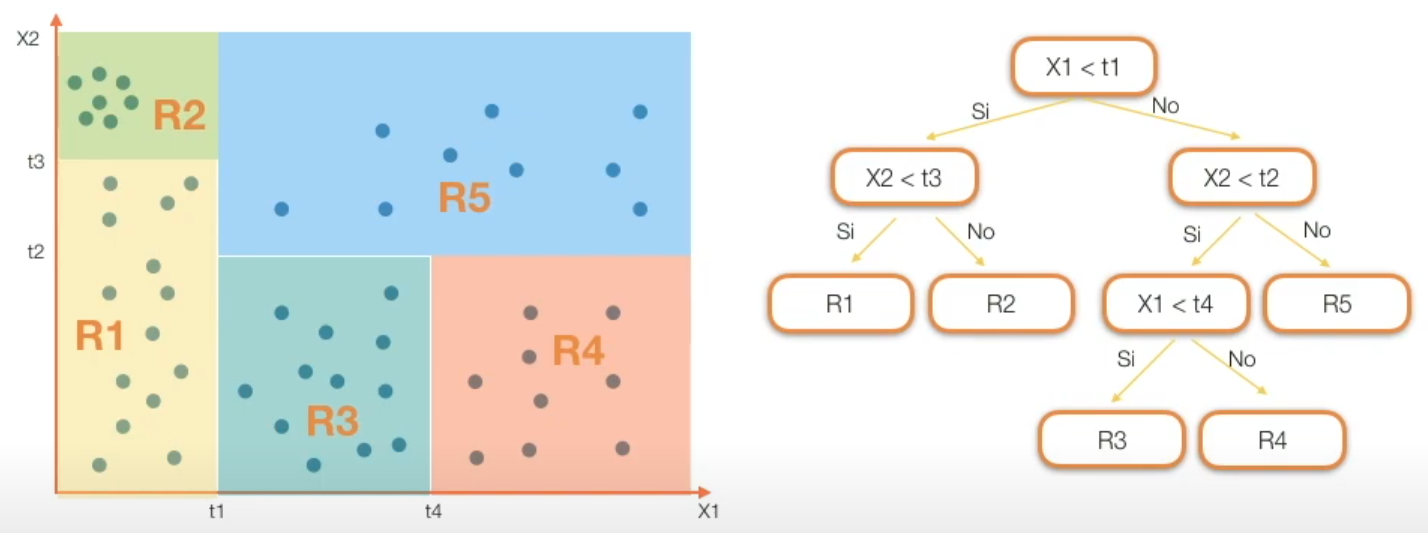

## Importar librerias

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importar dataset

In [15]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

## Entrenamiento del modelo

In [16]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(X, y)

DecisionTreeRegressor(random_state=0)

## Predecir un nuevo resultado

In [17]:
regressor.predict([[6.5]])

array([150000.])

## Visualización de los resultados

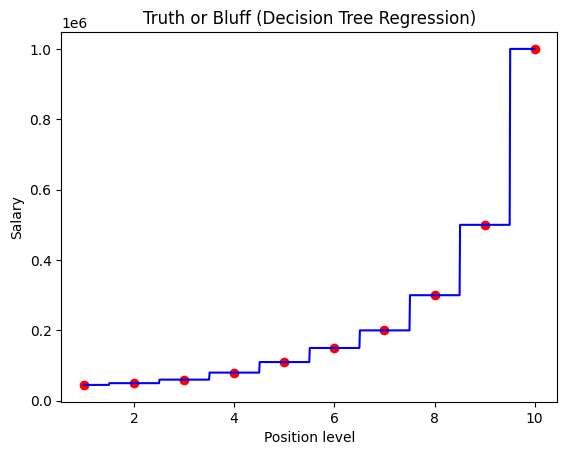

In [18]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Decision Tree Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# 6. Random Forest Regression

## Explicación

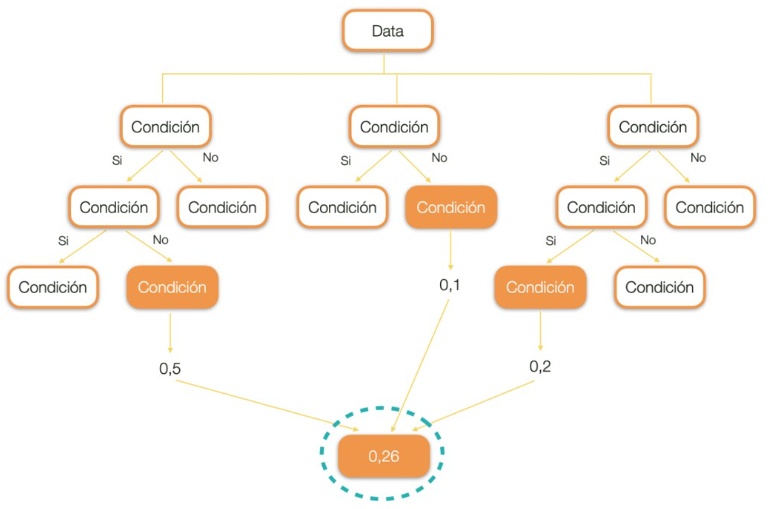

## Importar librerias

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importar dataset

In [20]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

## Entrenamiento del modelo

In [21]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X, y)

RandomForestRegressor(n_estimators=10, random_state=0)

## Predecir nuevos resultados

In [22]:
regressor.predict([[6.5]])

array([167000.])

## Visualización del Random Forest Regression

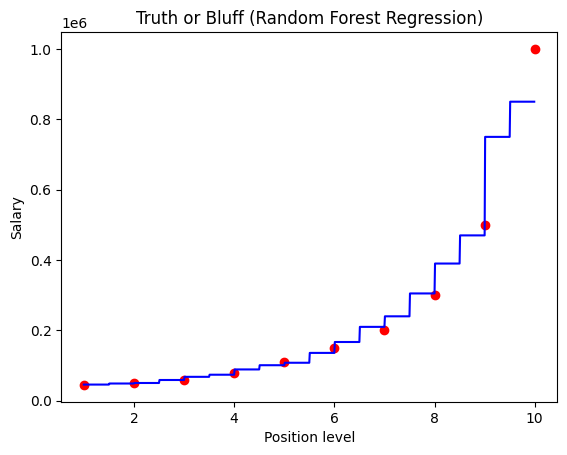

In [23]:
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = 'red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()